In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "zyx3zVjuesA-XsxzvSFp"

In [2]:
df = yf.download("AAPL",
                 start="2000-01-01",
                 end="2022-12-31",
                 progress=False)

df = df.loc[:,["Adj Close"]]

In [3]:
#Returns
df["rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

In [4]:
#Adjust inflation

#Daily to monthly
df = df.resample("M").last()

#Download
df_cpi = (
    nasdaqdatalink.get(dataset="RATEINF/CPI_GBR",
                       start_date="2000-01-01",
                       end_date="2022-12-31")
    .rename(columns={"Value": "cpi"})
) 

#Merge
df1 = df.join(df_cpi, how="left")

In [5]:
df1 = df1.sort_index(axis=1)
df1 = df1.iloc[1:]

In [6]:
df1["inflation_rate"] = df1["cpi"].pct_change()
df1["simple_rtn"] = df1["Adj Close"].pct_change()

In [9]:
df1["real_rtn"] = (
    (df1["simple_rtn"] + 1) / (df1["inflation_rate"] + 1) - 1
)

In [16]:
df1  = pd.DataFrame(df1)

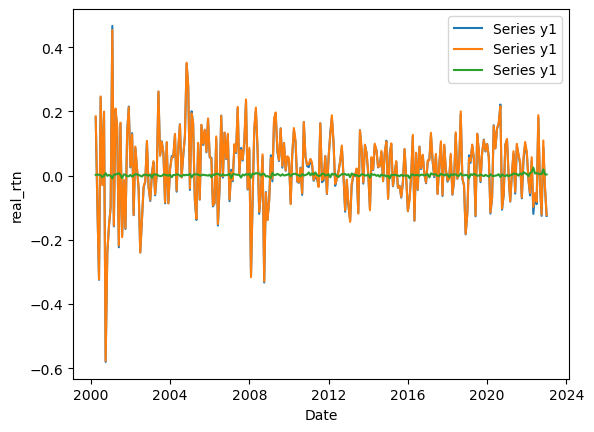

In [27]:
sns.lineplot(x='Date', y='real_rtn', data=df1, label='Series y1')
sns.lineplot(x='Date', y='simple_rtn', data=df1, label='Series y1')
sns.lineplot(x='Date', y='inflation_rate', data=df1, label='Series y1')

plt.show()

In [28]:
#Frequency of time series data
df

,Adj Close,rtn,log_rtn
Date,,,
2000-01-31,0.787335,0.020910,0.020694
2000-02-29,0.869864,0.012141,0.012068
2000-03-31,1.030651,0.080020,0.076980
2000-04-30,0.941483,-0.021202,-0.021430
2000-05-31,0.637457,-0.040685,-0.041536
...,...,...,...
2022-08-31,156.503876,-0.010635,-0.010692
2022-09-30,137.570496,-0.030039,-0.030500
2022-10-31,152.641541,-0.015410,-0.015530
